In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('customers.csv')

In [8]:
print(data.head())

   CustomerID  Annual_Spend  Frequency_of_Purchase  Average_Purchase_Value
0           1         15000                     50                     300
1           2         22000                     60                     367
2           3         17000                     55                     309
3           4         18000                     45                     400
4           5         25000                     80                     312


In [9]:
X = data[['Annual_Spend', 'Frequency_of_Purchase', 'Average_Purchase_Value']]

In [10]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\sheema\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sheema\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sheema\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sheema\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

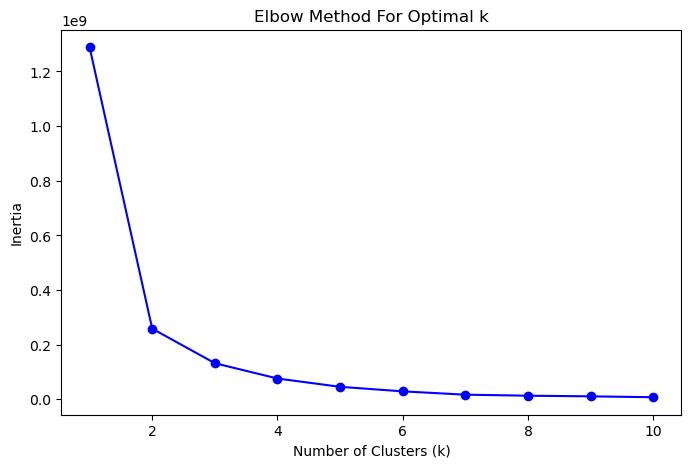

In [11]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

C:\Users\sheema\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sheema\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# Display the first few rows of the dataset with the cluster assignments
print(data.head())

   CustomerID  Annual_Spend  Frequency_of_Purchase  Average_Purchase_Value  \
0           1         15000                     50                     300   
1           2         22000                     60                     367   
2           3         17000                     55                     309   
3           4         18000                     45                     400   
4           5         25000                     80                     312   

   Cluster  
0        1  
1        2  
2        1  
3        1  
4        0  


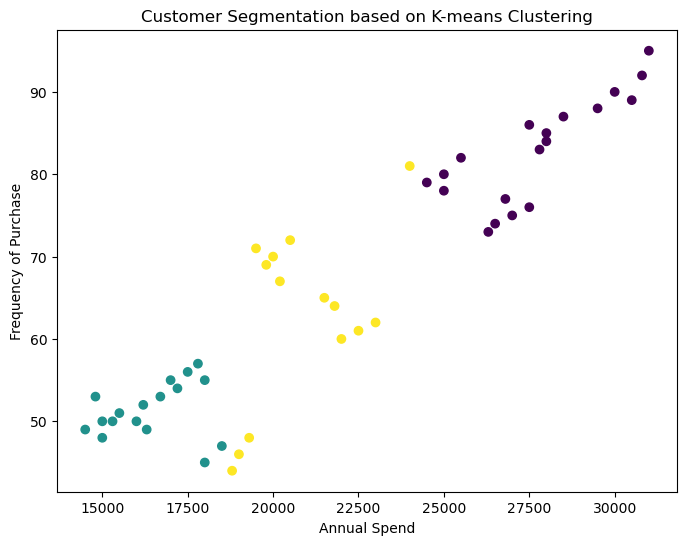

In [14]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual_Spend'], data['Frequency_of_Purchase'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Spend')
plt.ylabel('Frequency of Purchase')
plt.title('Customer Segmentation based on K-means Clustering')
plt.show()